# AMC with MATLAB (Deep Learning toolbox)

Using the matlab jupyter kernel from [here](https://github.com/Calysto/matlab_kernel).

Load one of the training sets and visualize

In [1]:
data = load('./data/qpsk_data.mat').data;

In [2]:
size(data)


ans =

         512        1024



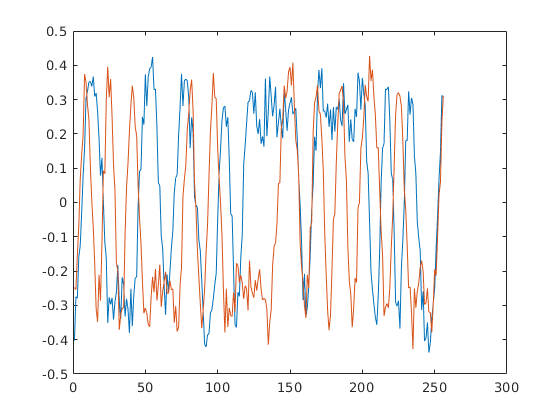

In [3]:
plot(real(data(1,1:256)))
hold on
plot(imag(data(1,1:256)))

In [4]:
complex_data = cat(3,real(data),imag(data));

In [5]:
size(complex_data)


ans =

         512        1024           2



## Prep training data

In [6]:
x_train = [];
y_train = [];

In [7]:
myFiles = dir ('./data/*.mat');

In [8]:
for i = 1:size(myFiles,1)
    data = load(strcat('./data/',myFiles(i).name)).data;
    data = cat(3,real(data),imag(data)); % concat real/imag
    labels = ones(size(data,1),1)*i-1;
    
    x_train = cat(1, x_train, data);
    y_train = cat(1, y_train, labels);
end

In [9]:
size(x_train)
size(y_train)


ans =

        2048        1024           2


ans =

        2048           1



Matlab is weird in that it requires batches to be the last dimension... Hence the permutes and reshapings

In [10]:
x_train = permute(x_train, [2,3,1]);

In [11]:
x_train = reshape(x_train, 1024, 2, [], 2048); % sneak in a cheeky extra dimension

Training labels must be cast into the special 'categorical' type before we feed it to the neural net

In [12]:
y_train = permute(y_train, [2,1]);
y_train = categorical(y_train);

## Train model

In [13]:
layers = [
    imageInputLayer([1024 2 1])

    convolution2dLayer([16 2],8,'Padding',0)
    reluLayer

    convolution2dLayer([16 1],4,'Padding',0)
    reluLayer
    
    fullyConnectedLayer(120)
    reluLayer
    
    fullyConnectedLayer(84)
    reluLayer

    fullyConnectedLayer(4)
    softmaxLayer
    classificationLayer];

In [16]:
options = trainingOptions('adam', ...
    'MaxEpochs',10, ...
    'Verbose',true, ...
    'Shuffle', 'every-epoch');

In [17]:
net = trainNetwork(x_train, y_train, layers, options);

Training on single GPU.
Initializing input data normalization.
|========================================================================================|
|  Epoch  |  Iteration  |  Time Elapsed  |  Mini-batch  |  Mini-batch  |  Base Learning  |
|         |             |   (hh:mm:ss)   |   Accuracy   |     Loss     |      Rate       |
|========================================================================================|
|       1 |           1 |       00:00:02 |       29.69% |       1.3823 |          0.0010 |
|       4 |          50 |       00:00:03 |       99.22% |       0.0304 |          0.0010 |
|       7 |         100 |       00:00:04 |      100.00% |       0.0012 |          0.0010 |
|      10 |         150 |       00:00:05 |      100.00% |       0.0006 |          0.0010 |
|      10 |         160 |       00:00:05 |      100.00% |       0.0007 |          0.0010 |
|========================================================================================|
